# Auto Fraud Dataset Challenge

### This project involves reading in data related to Insurance Fraud in the Auto sector, preprocessing the data, and then running a variety of predictive models to see which is able to correctly classify a claim as either fraudulent or legitimate (1 for fraud, 0 for legitimate)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

Code to connect to my plotly account so that graphs can be made using this package

In [2]:
import plotly
plotly.tools.set_credentials_file(username='sdowney1', api_key='PC2qXy2yuYoEwvACH4Fr')

Reading in the training and testing data and seeing which columns in the training data have missing values

In [3]:
fraud=pd.read_csv('claim_data_v2_train.csv')
fraud_test=pd.read_csv('Claim_Score_Dataset.csv')
fraud.isnull().sum()

State_Code                        0
State                             0
Claim_Amount                      0
Education                        11
Claim_Date                        0
Employment_Status                 0
Gender                            0
Income                            0
Location                          3
Marital_Status                    0
Monthly_Premium                   0
Annual_Premium                    0
Months_Since_Last_Claim           0
Months_Since_Policy_Inception     0
Claim_Cause                       0
Claim_Report_Type                 0
Vehicle_Class                     0
Vehicle_Size                      0
Vehicle_Model                     0
Outstanding_Balance               9
Fraudulent_Claim                  0
Claimant__Number                  0
dtype: int64

This bar graph shows the number of claims by individual State.

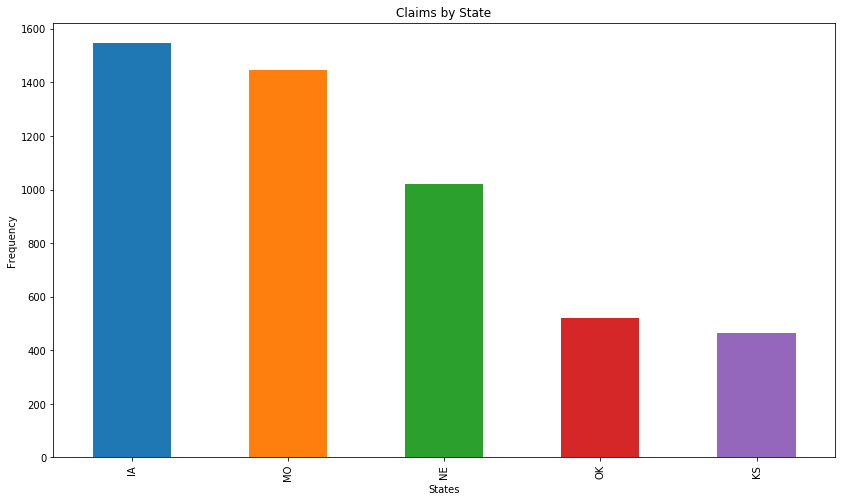

In [4]:
ax = fraud['State_Code'].value_counts().plot(kind='bar',
                                         figsize = (14,8),
                                         title = "Claims by State")
ax.set_xlabel("States")
ax.set_ylabel("Frequency")
plt.show()

This bar chart shows the distribution of how claims are reported

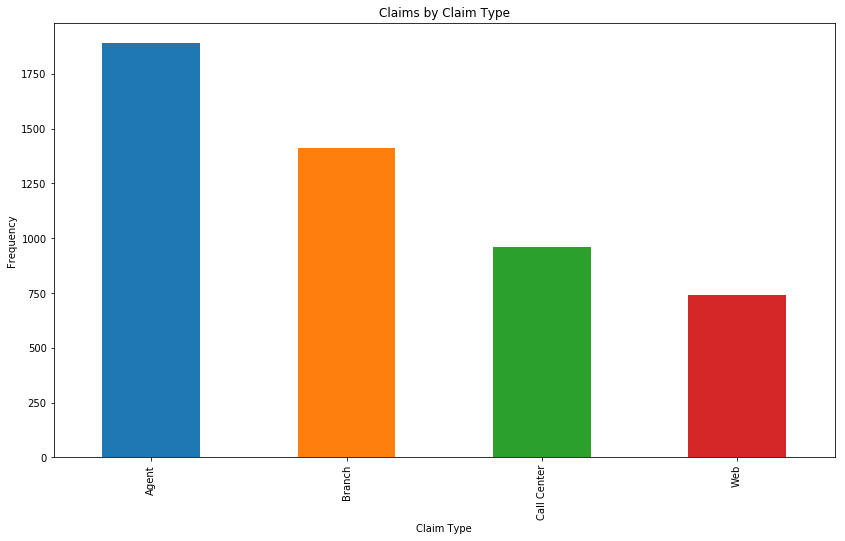

In [5]:
ax = fraud['Claim_Report_Type'].value_counts().plot(kind='bar',
                                         figsize = (14,8),
                                         title = "Claims by Claim Type")
ax.set_xlabel("Claim Type")
ax.set_ylabel("Frequency")
plt.show()

This double histogram shows the distributions of the Months Since Policy Inception and Months Since Last Claim variables

In [6]:
trace0 = go.Histogram(
    x = fraud.Months_Since_Policy_Inception, name='Months Since Policy Inception'
)

trace1 = go.Histogram(
    x = fraud.Months_Since_Last_Claim, name='Months Since Last Claim'
)

data = [trace0, trace1]
layout = go.Layout(barmode = "stack")
fig = go.Figure (data=data,layout=layout)
py.iplot(fig, filename = 'stacked hist')

This histogram on the Claim Amount data shows that the variable is skewed, which means it needs to be transformed

In [7]:
data = [go.Histogram(x=fraud.Claim_Amount)]
py.iplot(data, filename = 'Claim Amount Histogram')

This histogram of revenue shows that it is a very skewed variable, so it will need to either be transformed or binned

In [8]:
data = [go.Histogram(x=(fraud.Income))]
py.iplot(data, filename = "Income")

These next histograms check the distibutions of the remaining numeric variables that we are not binning into categorical variables. None of them are skewed, so they will not be transformed.

In [9]:
data = [go.Histogram(x=fraud.Monthly_Premium)]
py.iplot(data, filename = "Monthly Premium Histogram")

In [10]:
data = [go.Histogram(x=fraud.Annual_Premium)]
py.iplot(data, filename = "Annual Premium Histogram")

In [11]:
data = [go.Histogram(x=fraud.Outstanding_Balance)]
py.iplot(data, filename = "Outstanding Balance")

Function to fill missing values in the Outstanding Balance variable with 0s, as we assumed that a missing value meant that the car was paid off.

In [12]:
def simplify_balance(df):
    df.Outstanding_Balance=df.Outstanding_Balance.fillna(0)
    return df

Function to fill missing values in the Location variable with the mode of the column

In [13]:
def simplify_location(df):
    mode=st.mode(df.Location)
    df.Location=df.Location.fillna(mode)
    return df

Function to bin the Months Since Policy Inception Variable

In [14]:
def simplify_inception(df):
    bins=(-1,2,6,12,24,1000)
    group_names=["1. New Customer","2. 6 Months","3. 1 year","4. 2 years","5. Long-Term Customer"]
    categories=pd.cut(df.Months_Since_Policy_Inception,bins,labels=group_names)
    df.Months_Since_Policy_Inception=categories
    return df

Function to bin incomes into their tax brackets

In [15]:
def simplify_income(df):
    bins = (-0.5, 10000, 30000, 50000, 70000, 16000000)
    group_names = ['1. Poor','2. Lower-Middle','3. Middle','4. Upper-Middle','5. Upper'] 
    categories = pd.cut(df.Income, bins, labels=group_names) 
    df.Income = categories 
    return df

Function to fill missing education values with the mode of the column, then renaming the values to make the output of the encoding process more logical.

In [16]:
def simplify_education(df):
    mode=st.mode(df.Education)
    df.Education=df.Education.fillna(mode)
    df.Education[df.Education == "High School or Below"]="1. High School or Below"
    df.Education[df.Education == "College"]="2. College"
    df.Education[df.Education == "Bachelor"]="3. Bachelor"
    df.Education[df.Education == "Master"]="4. Master"
    df.Education[df.Education == "Doctorate"]="5. Doctorate"
    
    return(df)

Function to transform the Claim Amount variable so that it is more normally distributed

In [17]:
def normalize_claimamt(df):
    df.Claim_Amount=np.log(df.Claim_Amount)
    
    return df

Funtion to drop any unnecessary variables. For now, we only drop the State variable because the State Code variable contains the same information. We keep all other variables because they have the potential to be significant in our models.

In [18]:
def drop_vars(df):
    return df.drop(['State'],axis=1)

Function to run all of the previous variable transformation variables all at once

In [19]:
def transform_vars(df):
    df=simplify_balance(df)
    df=simplify_location(df)
    df=simplify_inception(df)
    df=simplify_income(df)
    df=simplify_education(df)
    df=normalize_claimamt(df)
    df=drop_vars(df)
    
    return df

Running the functions on the data to clean it

In [20]:
fraud=transform_vars(fraud)
fraud_test=transform_vars(fraud_test)
fraud[:5]

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a sli

,State_Code,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,Monthly_Premium,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,KS,6.355343,3. Bachelor,12/01/2018,Employed,F,4. Upper-Middle,Suburban,Married,113,...,32,2. 6 Months,Collision,Agent,Two-Door Car,Midsize,Toyota,25781.0,N,1001
1,NE,6.548153,3. Bachelor,12/01/2018,Unemployed,F,1. Poor,Suburban,Single,109,...,13,5. Long-Term Customer,Scratch/Dent,Agent,Four-Door Car,Midsize,Chevrolet,37061.0,N,1002
2,OK,7.161423,3. Bachelor,12/01/2018,Employed,F,3. Middle,Suburban,Married,126,...,18,5. Long-Term Customer,Collision,Agent,Two-Door Car,Midsize,Chevrolet,17236.0,N,1003
3,MO,6.639335,3. Bachelor,12/01/2018,Unemployed,M,1. Poor,Suburban,Married,101,...,18,5. Long-Term Customer,Collision,Call Center,SUV,Midsize,Honda,30270.0,N,1004
4,KS,5.639668,3. Bachelor,12/01/2018,Employed,M,3. Middle,Rural,Single,137,...,52,5. Long-Term Customer,Collision,Agent,Four-Door Car,Midsize,Ford,16263.0,N,1005


This graph shows the distribution of income after it is binned to check the skewness.

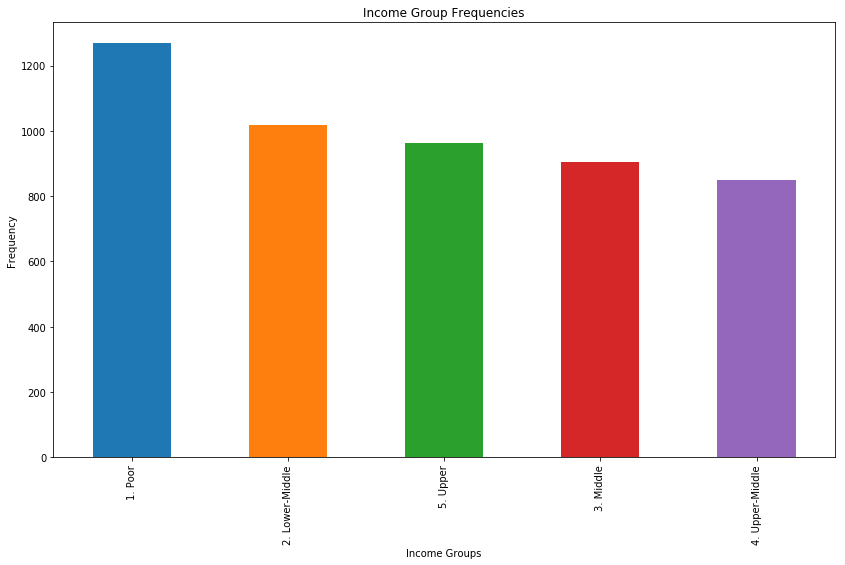

In [21]:
ax = fraud['Income'].value_counts().plot(kind = 'bar',
                                        figsize = (14,8),
                                        title="Income Group Frequencies")
ax.set_xlabel("Income Groups")
ax.set_ylabel("Frequency")
plt.show()

Encoding the variables by creating dummy variables for running regressions. For the two binary variables, we are hard coding them so that we can control what their values will be.

In [22]:
encode_vars={"Fraudulent_Claim": {"Y": 1, "N": 0}, "Gender":{"M": 0, "F": 1}}
fraud.replace(encode_vars, inplace=True)
fraud_test.replace(encode_vars, inplace=True)

fraud.Claim_Date=fraud.Claim_Date.str[:2]
fraud_test.Claim_Date=fraud_test.Claim_Date.str[:2]

fraud.Claim_Date=pd.to_numeric(fraud.Claim_Date)
fraud_test.Claim_Date=pd.to_numeric(fraud_test.Claim_Date)

fraud_dummies=pd.get_dummies(fraud, columns=["State_Code","Education","Employment_Status","Income","Location","Marital_Status",
                             "Months_Since_Policy_Inception","Claim_Cause","Claim_Report_Type","Vehicle_Class",
                             "Vehicle_Size","Vehicle_Model"], prefix=["State","Edu","Employment","Income", "Location",
                                                                     "Marital","Inception","Cause","Reported","Class",
                                                                     "Size","Model"])
fraud_test_dummies=pd.get_dummies(fraud_test, columns=["State_Code","Education","Employment_Status","Income","Location","Marital_Status",
                             "Months_Since_Policy_Inception","Claim_Cause","Claim_Report_Type","Vehicle_Class",
                             "Vehicle_Size","Vehicle_Model"], prefix=["State","Edu","Employment","Income", "Location",
                                                                     "Marital","Inception","Cause","Reported","Class",
                                                                     "Size","Model"])
fraud_test_dummies["Cause_Fire"]=0
fraud_test_dummies=fraud_test_dummies[['Claim_Amount', 'Claim_Date', 'Gender', 'Monthly_Premium',
       'Annual_Premium', 'Months_Since_Last_Claim', 'Outstanding_Balance', 'Fraudulent_Claim', 'Claimant__Number',
       'State_IA', 'State_KS', 'State_MO', 'State_NE', 'State_OK',
       'Edu_1. High School or Below', 'Edu_2. College', 'Edu_3. Bachelor',
       'Edu_4. Master', 'Edu_Doctor', 'Employment_Disabled',
       'Employment_Employed', 'Employment_Medical Leave',
       'Employment_Retired', 'Employment_Unemployed', 'Income_1. Poor',
       'Income_2. Lower-Middle', 'Income_3. Middle',
       'Income_4. Upper-Middle', 'Income_5. Upper', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Inception_1. New Customer',
       'Inception_2. 6 Months', 'Inception_3. 1 year',
       'Inception_4. 2 years', 'Inception_5. Long-Term Customer',
       'Cause_Collision', 'Cause_Fire', 'Cause_Hail', 'Cause_Other',
       'Cause_Scratch/Dent', 'Reported_Agent', 'Reported_Branch',
       'Reported_Call Center', 'Reported_Web', 'Class_Four-Door Car',
       'Class_Luxury Car', 'Class_Luxury SUV', 'Class_SUV',
       'Class_Sports Car', 'Class_Two-Door Car', 'Size_Compact',
       'Size_Luxury', 'Size_Midsize', 'Model_Chevrolet', 'Model_Ford',
       'Model_Honda', 'Model_Toyota']]
fraud_dummies.sample(5)

,Claim_Amount,Claim_Date,Gender,Monthly_Premium,Annual_Premium,Months_Since_Last_Claim,Outstanding_Balance,Fraudulent_Claim,Claimant__Number,State_IA,...,Class_SUV,Class_Sports Car,Class_Two-Door Car,Size_Compact,Size_Luxury,Size_Midsize,Model_Chevrolet,Model_Ford,Model_Honda,Model_Toyota
4884,7.372995,1,1,129,1548,1,2142.0,0,5885,1,...,1,0,0,0,0,1,1,0,0,0
541,8.184530,12,0,69,828,24,2626.0,0,1542,1,...,0,0,0,0,0,1,0,0,0,1
2667,6.180311,12,1,80,960,4,47061.0,0,3668,0,...,0,0,0,0,0,1,0,0,1,0
3933,6.146342,12,1,71,852,28,42584.0,0,4934,0,...,0,0,1,0,0,1,0,0,0,1
3067,7.559303,12,0,128,1536,4,22723.0,0,4068,0,...,0,0,0,1,0,0,0,0,0,1


Encoding variables so that they are all numeric for running decision trees and random trees.

In [23]:
from sklearn import preprocessing 
def encode_features(df_train): 
    features = ["State_Code","Education","Employment_Status","Income","Location","Marital_Status",
                             "Months_Since_Policy_Inception","Claim_Cause","Claim_Report_Type","Vehicle_Class",
                             "Vehicle_Size","Vehicle_Model"] 
    df_combined = pd.concat([df_train[features]]) 
    for feature in features: 
        le = preprocessing.LabelEncoder() 
        le = le.fit(df_combined[feature]) 
        df_train[feature] = le.transform(df_train[feature]) 
    return df_train

fraud_encoded= encode_features(fraud)
fraud_test_encoded=encode_features(fraud_test)
fraud_encoded.sample(5)

,State_Code,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,Monthly_Premium,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
2378,0,6.196857,2,12,4,1,0,1,2,90,...,23,4,0,1,0,2,3,12841.0,0,3379
2561,4,6.717596,1,12,1,0,4,1,1,61,...,6,4,4,3,0,2,3,22084.0,0,3562
926,0,6.919234,1,12,1,1,3,1,0,139,...,15,3,2,0,1,1,3,26263.0,0,1927
4017,0,6.725232,2,1,4,1,0,1,2,110,...,3,4,2,1,3,2,3,47369.0,0,5018
4990,0,5.932674,1,1,4,1,0,1,1,84,...,25,3,0,1,3,2,2,22772.0,0,5991


Splitting both encoded datasets into training and testing sets

In [24]:
from sklearn.model_selection import train_test_split 

X_all = fraud_dummies.drop(['Fraudulent_Claim', 'Claimant__Number'], axis=1) 
y_all = fraud_dummies['Fraudulent_Claim'] 

X_all2 = fraud_encoded.drop(['Fraudulent_Claim', 'Claimant__Number'], axis=1) 
y_all2 = fraud_encoded['Fraudulent_Claim'] 

num_test = 0.30 
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
    test_size=num_test, random_state=23)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all2, y_all2, 
    test_size=num_test, random_state=23)

Visualizing the distibution of fraudlent claims in the training data. It can be seen that the data is very unbalanced, so resampling is needed.

col_0,count
Fraudulent_Claim,
0,3292
1,208


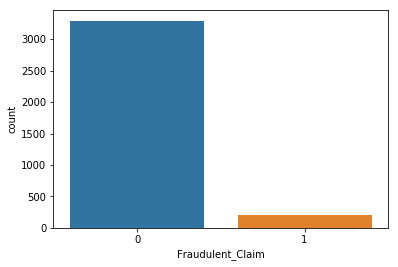

In [25]:
sns.countplot(x=y_train)
counts = pd.crosstab(index=y_train,columns="count")   
counts

Code to implement undersampling on the both of the train datasets, then checking the distribution to make sure it worked

In [26]:
from imblearn.under_sampling import RandomUnderSampler
#good seeds: 2018, 50, 300, 400
rus = RandomUnderSampler(return_indices=True, random_state=400)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

X_rus2, y_rus2, id_rus2 = rus.fit_sample(X_train2, y_train2)

col_0,count
row_0,
0,208
1,208


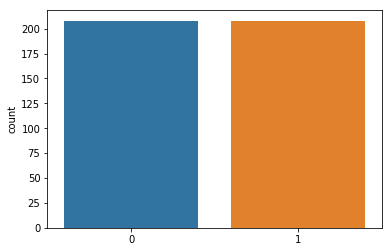

In [27]:
sns.countplot(x=y_rus)
counts = pd.crosstab(index=y_rus,columns="count")   
counts

sns.countplot(x=y_rus2)
counts2 = pd.crosstab(index=y_rus2,columns="count")   
counts2

Code to implement SMOTE (Synthetic Minority Over-sampling Technique) oversampling. This technique involves creating synthetic data points by using k nearest neighbors concepts. We then plot the new distibution to make sure the resampling works.

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority', random_state=400)
X_sm, y_sm = smote.fit_sample(X_train, y_train)

X_sm2, y_sm2 = smote.fit_sample(X_train2, y_train2)

col_0,count
row_0,
0,3292
1,3292


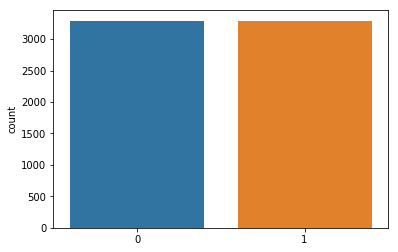

In [29]:
sns.countplot(x=y_sm)
counts = pd.crosstab(index=y_sm,columns="count")   
counts

sns.countplot(x=y_sm)
counts = pd.crosstab(index=y_sm,columns="count")   
counts

Code to run a decision tree using the SMOTE oversampled data

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
tree = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Fit the best algorithm to the data. 
tree.fit(X_sm2, y_sm2)

predictions = tree.predict(X_test2)
print(accuracy_score(y_test2, predictions))


0.7968021319120586


Code to run a decision tree on the undersampled data

In [31]:
# Choose the type of classifier. 
tree_under = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Fit the best algorithm to the data. 
tree_under.fit(X_rus2, y_rus2)

predictions = tree_under.predict(X_test2)
print(accuracy_score(y_test2, predictions))

0.5756162558294471


Code to run a logistic regression on the SMOTE oversampled data using recursive feature elimination, which only keeps the most important variables in the model according to how many variables we want to consider in our model.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
reg = LogisticRegression()

rfe = RFE(reg, 15)
# Fit the best algorithm to the data. 
rfe=rfe.fit(X_sm, y_sm)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Code to display which features were chosen by the RFE model

In [33]:
features_bool = np.array(rfe.support_)
features = np.array(X_train.columns)
result = features[features_bool]
result

array(['Gender', 'Edu_1. High School or Below', 'Edu_2. College',
       'Edu_3. Bachelor', 'Employment_Employed', 'Location_Rural',
       'Marital_Single', 'Cause_Collision', 'Cause_Hail', 'Cause_Other',
       'Cause_Scratch/Dent', 'Class_Four-Door Car', 'Class_SUV',
       'Class_Sports Car', 'Class_Two-Door Car'], dtype=object)

Code to display the coefficients of the RFE model

In [47]:
print(rfe.estimator_.coef_)
print(rfe.estimator_.intercept_)
predictions = rfe.predict(X_test)
print(accuracy_score(y_test, predictions))

[[-1.45174902  1.03677035 -0.52681841 -0.72826138  0.74281929  0.69914823
   0.54637357  0.55411191 -2.31416034  0.53052092  1.3047259  -2.15789961
  -0.60394548  1.3578326   0.6074249 ]]
[-0.90716523]
0.6302465023317788


Code to run an RFE logistic regression on the undersampled data

In [35]:
# Choose the type of classifier. 
reg = LogisticRegression()

rfe_under = RFE(reg, 15)
# Fit the best algorithm to the data. 
rfe=rfe_under.fit(X_rus, y_rus)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\student\Anaconda3\lib\site

Code to implement a random forest model on the SMOTE oversampled data

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
forest = RandomForestClassifier(n_estimators=15, criterion="entropy", max_depth=3, min_samples_leaf=10, random_state=150)

# Fit the best algorithm to the data. 
forest.fit(X_sm2, y_sm2)

predictions = forest.predict(X_test2)
print(accuracy_score(y_test2, predictions))

0.798800799467022


Code to implement a random forest on the undersampled data

In [37]:
# Choose the type of classifier. 
forest_under = RandomForestClassifier(n_estimators=15, criterion="gini", max_depth=3, min_samples_leaf=10, random_state=150)

# Fit the best algorithm to the data. 
forest_under.fit(X_rus2, y_rus2)

predictions = forest_under.predict(X_test2)
print(accuracy_score(y_test2, predictions))

0.6728847435043305


Code to implement a neural network on the SMOTE oversampled data

In [38]:
# Data must be standardized before running a neural network
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_sm)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
# The transformations are applied to the oversampled data:
X_sm = scaler.transform(X_sm)
X_test = scaler.transform(X_test)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [40]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(60,60,60), activation= 'identity')

mlp.fit(X_sm,y_sm)

predictions = mlp.predict(X_test)


Code to display the confusion matrix and evaluation metrics for a neural network

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))


print(classification_report(y_test,predictions))


[[1006  396]
 [  28   71]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      1402
           1       0.15      0.72      0.25        99

   micro avg       0.72      0.72      0.72      1501
   macro avg       0.56      0.72      0.54      1501
weighted avg       0.92      0.72      0.79      1501



Code to run a neural network on the undersampled data

In [42]:
# The transformations are applied to the undersampled data:
X_rus = scaler.transform(X_rus)
X_test = scaler.transform(X_test)

In [43]:
mlp2 = MLPClassifier(hidden_layer_sizes=(60,60,60), activation= 'identity')

mlp2.fit(X_rus,y_rus)

predictions = mlp2.predict(X_test)


In [44]:
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))


[[786 616]
 [ 19  80]]
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      1402
           1       0.11      0.81      0.20        99

   micro avg       0.58      0.58      0.58      1501
   macro avg       0.55      0.68      0.46      1501
weighted avg       0.92      0.58      0.68      1501



Code to run all of our models that were run on the SMOTE oversampled data against the true testing dataset to see which performs best

In [45]:
print("Decision Tree")
predictions_tree = tree.predict(fraud_test_encoded.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_encoded.Fraudulent_Claim, predictions_tree))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_tree))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_tree))

print("\nRandom Forest")
predictions_forest = forest.predict(fraud_test_encoded.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_encoded.Fraudulent_Claim, predictions_forest))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_forest))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_forest))

print("\nLogistic Regression")
predictions_reg = rfe.predict(fraud_test_dummies.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_dummies.Fraudulent_Claim, predictions_reg))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_reg))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_reg))

print("\nNeural Network")
predictions_nno = mlp.predict(fraud_test_dummies.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_dummies.Fraudulent_Claim, predictions_nno))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_nno))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_nno))


Decision Tree
Accuracy Score: 0.6981037924151696

Confusion Matrix:
 [[2674  756]
 [ 454  124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      3430
           1       0.14      0.21      0.17       578

   micro avg       0.70      0.70      0.70      4008
   macro avg       0.50      0.50      0.49      4008
weighted avg       0.75      0.70      0.72      4008


Random Forest
Accuracy Score: 0.781437125748503

Confusion Matrix:
 [[3067  363]
 [ 513   65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      3430
           1       0.15      0.11      0.13       578

   micro avg       0.78      0.78      0.78      4008
   macro avg       0.50      0.50      0.50      4008
weighted avg       0.76      0.78      0.77      4008


Logistic Regression
Accuracy Score: 0.5895708582834331

Confusion Matrix:
 [[2172 1258]
 [ 387  191]]



Code to run all of the models trainined on the undersampled data against the true testing data

In [46]:
print("Decision Tree")
predictions_tree_u = tree_under.predict(fraud_test_encoded.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_encoded.Fraudulent_Claim, predictions_tree_u))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_tree_u))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_tree_u))

print("\nRandom Forest")
predictions_forest_u = forest_under.predict(fraud_test_encoded.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_encoded.Fraudulent_Claim, predictions_forest_u))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_forest_u))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_forest_u))

print("\nLogistic Regression")
predictions_reg_u = rfe_under.predict(fraud_test_dummies.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_dummies.Fraudulent_Claim, predictions_reg_u))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_reg_u))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_reg_u))

print("\nNeural Network")
predictions_nnu = mlp2.predict(fraud_test_dummies.drop(['Claimant__Number','Fraudulent_Claim'], axis=1))
print("Accuracy Score:",accuracy_score(fraud_test_dummies.Fraudulent_Claim, predictions_nno))
print("\nConfusion Matrix:\n",confusion_matrix(fraud_test_dummies.Fraudulent_Claim,predictions_nnu))
print("\nClassification Report:\n",classification_report(fraud_test_dummies.Fraudulent_Claim,predictions_nnu))

Decision Tree
Accuracy Score: 0.49101796407185627

Confusion Matrix:
 [[1690 1740]
 [ 300  278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.49      0.62      3430
           1       0.14      0.48      0.21       578

   micro avg       0.49      0.49      0.49      4008
   macro avg       0.49      0.49      0.42      4008
weighted avg       0.75      0.49      0.56      4008


Random Forest
Accuracy Score: 0.5800898203592815

Confusion Matrix:
 [[2135 1295]
 [ 388  190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.62      0.72      3430
           1       0.13      0.33      0.18       578

   micro avg       0.58      0.58      0.58      4008
   macro avg       0.49      0.48      0.45      4008
weighted avg       0.74      0.58      0.64      4008


Logistic Regression
Accuracy Score: 0.5895708582834331

Confusion Matrix:
 [[2172 1258]
 [ 387  191]]